NetworkX is a tool for representing and manipulating graphs in Python. It is included with Anaconda.

In [1]:
import networkx as nx

Make an instance of a Graph using the method ``.Graph``.

In [2]:
G = nx.Graph()

Add a single node to the graph using the method ``add_node``.

In [3]:
G.add_node("Jacie")

Add multiple nodes by passing an iterable (like a list) to ``add_nodes_from``. 

In [4]:
G.add_nodes_from(["John", "Juan", "Jack", "Julia", "Jade", "Jeff"])

Add an edge to the graph using ``add_edge``. 

In [5]:
G.add_edge("Jacie", "John")

There is now an edge between the nodes "Jacie" and "John".

Add multiple edges with ``add_edges_from``. The argument has to be a list of edges, each edge must contain the two endpoints of the edge.

In [6]:
G.add_edges_from([("Jacie", "Juan"), ("John", "Juan"), ("Juan", "Julia"), ("Juan", "Jade"), ("Jack", "Julia"), ("Julia", "Jeff"), ("Jade", "Jeff")])

Once we've made our graph, we can explore graph properties and obtain lists of nodes and edges.

In [7]:
G.number_of_nodes()

7

In [8]:
G.number_of_edges()

8

To get a list of the nodes in the graph, use ``nodes()``. This is helpful if you want to iterate through the nodes and do something with them.

In [9]:
G.nodes()

['Juan', 'Julia', 'John', 'Jack', 'Jacie', 'Jeff', 'Jade']

And edges using ``edges``:

In [10]:
G.edges()

[('Juan', 'Jade'),
 ('Juan', 'Julia'),
 ('Juan', 'John'),
 ('Juan', 'Jacie'),
 ('Julia', 'Jeff'),
 ('Julia', 'Jack'),
 ('John', 'Jacie'),
 ('Jeff', 'Jade')]

Find out which nodes are connected to a specific node using ``neighors``. It takes the target node as an argument.

In [11]:
G.neighbors("Juan")

['Jade', 'Julia', 'John', 'Jacie']

# Graph, Node, and Edge Attributes

Basic graphs contain information about relationships between entities only. However, the nodes, the edges, and the graph itself can have attributes with values, and NetworkX is capable of storing them.

The graph itself can be assigned attributes. This is useful if you are working with multiple graphs and need a means to distinguish them. Perhaps you are making a graph every week and tracing the development of the graph. To add or update a graph-level attribute, access its ``.graph`` attribute and use subscript notation to indicate the name of the attribute.

In [12]:
G.graph["week_number"] = 1
G.graph["graph_id"] = 12345
G.graph["manager"] = "Willard"

Access the graph's ``.graph`` attribute without the bracket notation will show you all of the attributes. 

In [13]:
G.graph

{'graph_id': 12345, 'manager': 'Willard', 'week_number': 1}

To manipulate a node attribute, access the graph's ``node`` attribute, use bracket notation to target a node, then use bracket notation again to specify the attribute.

In [14]:
# Right now the node "Juan" has no attributes
G.node["Juan"]

{}

In [15]:
# I set the "age" attribute of "Juan" to 29
G.node["Juan"]["age"] = 29

Later I can easily access the node's value.

In [16]:
G.node["Juan"]["age"]

29

You can add multiple new nodes that share the same attribute value by passing the attribute as a named argument to ``add_nodes_from``.

In [17]:
# all these new nodes will have a "course" attribute set to "Z639"

G.add_nodes_from(["Herakles", "Rut", "Teodosio",  "Priscila", "Kornelia"], course="Z639")

In [18]:
print(G.node["Teodosio"]["course"])
print(G.node["Priscila"]["course"])

Z639
Z639


Edges can have attributes, too. Access and modify them using the graph's ``edge`` property. You need to subscript **3** times, once to indicate the origin node, second to indicate the target node, and the third to indicate the attribute. 

In [19]:
G.edge["Jacie"]["John"]["weight"] = 2.5

In [20]:
G.edge["Jacie"]["John"]

{'weight': 2.5}

In [21]:
# All these edges will have a weight of 5

G.add_edges_from([("Teodosio", "Herakles"), ("Teodosio", "Kornelia")], weight=5.0)

In [22]:
G.edge["Kornelia"]["Teodosio"]["weight"]

5.0

# Adding Edges for Nodes not in the Graph

NetworkX is pretty forgiving during the creation of graphs. If you use it to add an edge betwee two nodes that aren't already in the graph, then it'll automatically create those nodes.

In [23]:
G.add_edge("Larry", "Mary") # These nodes aren't in the graph

In [24]:
G.nodes()

['Juan',
 'Julia',
 'Kornelia',
 'Jack',
 'Rut',
 'Mary',
 'Priscila',
 'Herakles',
 'John',
 'Jacie',
 'Jeff',
 'Larry',
 'Jade',
 'Teodosio']

We added an edge for two non-existent nodes and NetworkX went ahead and created them. This is useful when first making your graph, programmatically: rather than tediously making nodes and then creating the edge between them, just make the edges and the node creation happens automatically.

# Directed Graph

The graph we made above is undirected, meaning that the edges bear no direction. This is how we would model, for example, a Facebook network, since all relationships *must* be reciprocal: if A is friends with B, then B is friends with A. 

Notice that since the graph ``G`` is undirected, when I add a weight to the edge from A to B, that weight is also added to the edge B to A, because **they are the same edge**. 

In [25]:
# Make weight of edge from Mary to Larry 5.0
G.edge['Mary']['Larry']['weight'] = 5.0
# What is the weight of the edge from Larry to Mary?
print(G.edge['Larry']['Mary']['weight'])

5.0


Also note that Mary is among Larry's neighbors and Larry is among Mary's neighbors.

In [26]:
# Mary's neighbors.
G.neighbors("Mary")

['Larry']

In [27]:
# Larry's neighbors
G.neighbors("Larry")

['Mary']

When we make a **directed graph** using NetworkX, if there is a link from A to B, this does **not mean** there is **necessarily** a link from B to A. 

To make a directed graph in Network X, us the factory function ``DiGraph`` instead of ``Graph``. 

In [28]:
DG = nx.DiGraph()

In [29]:
# Use the same nodes from the undirected graph
DG.add_nodes_from(G.nodes())
DG.nodes()

['Juan',
 'Julia',
 'Kornelia',
 'Jack',
 'Rut',
 'Mary',
 'Priscila',
 'Herakles',
 'John',
 'Jacie',
 'Jeff',
 'Teodosio',
 'Jade',
 'Larry']

In [30]:
# Add a DIRECTED EDGE from Larry to Mary
DG.add_edge("Larry", "Mary")

We have an edge from Larry to Mary. This means Mary is a neighbor of Larry, but Larry is NOT a neighbor of Mary.

In [31]:
DG.neighbors("Larry")

['Mary']

In [32]:
DG.neighbors("Mary")

[]

If you're ever in a situation where you need to know which nodes have an edge pointing *to* a certain node, use the method ``predecessors``. 

In [33]:
DG.predecessors("Mary")

['Larry']

One scenario in which we'd use a directed graph is if we were making a Twitter follower network. Unlike with Facebook, if A follows B, this does NOT mean that B follows A. If the directed graph ``DG`` above were a follower network, this means that Larry follows Mary but Mary does not follow Larry. 

A directed graph means that if there is a link from A to B, it does not **necessarily mean** that there is a link from B to A. But this does not mean that a link from B to A is forbidden! Again, the Twitter analogy helps here. just because Larry follows Mary, it doesn't mean that Mary has to follow Larry. But she can. In this case, the relationship is reciprocal, but unlike in an undirected graph there are actually two edges between A and B: one that goes from A to B, and another, separate edge that goes from B to A.

In [34]:
DG.add_edge("Mary", "Larry")

Note that since in a digraph we're actually dealing with two separate edges pointing in the opposite direction, modifying the attributes of one does not modify the attributes of the other. 

In [35]:
# Adding weight to the edge from Mary to Larry
DG.edge["Mary"]["Larry"]["weight"] = 5

In [36]:
# We can see the weight we just added
DG.edge["Mary"]["Larry"]

{'weight': 5}

In [37]:
# BUT in the reciprocal edge from Larry to Mary, there is no weight.
# They are different edges.
DG.edge["Larry"]["Mary"]

{}

# Building a Network from Twitter

In the following code, I'm going to build an **ego network**. They're called such because they are seeded with an **ego**, a single individual from whom the network will be grown. 

I'm going to use my on Twitter handle to do this, for the simple reason that I'm not a very active Twitter user so the number of people who follow me is very small.

Starting with my account, I'll get all the accounts who follow me. I'll create an empty list and add a tuple for each relationship in the form (follower's screen name, "vqmalic").

Then, I'll get **all my follower's followers**, and add those relationships to the edge list.

Note that this type of breadth-first search will grow exponentially very fast, particularly if someone who follows me has a huge amount of followers. Therefore, instead of using the ``Cursor`` object I'm going to use normal API calls which will only get the first 25 followers per user. For a project, you'd probably have to use the Cursor and this process would take a considerable amount of time. 

In [38]:
API_KEY = ""
API_SECRET = ""
import tweepy
auth = tweepy.AppAuthHandler(API_KEY, API_SECRET)
api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

In [43]:
edges = []

ego = api.get_user("vqmalic")

for follower in ego.followers():
    follower_sn = follower.screen_name
    edges.append((follower_sn, "vqmalic"))
    try:
        for follower2 in follower.followers():
            follower2_sn = follower2.screen_name
            edges.append((follower2_sn, follower_sn))
    except:
        print("Not authorized, skipping.")

Rate limit reached. Sleeping for: 309
Not authorized, skipping.


In [45]:
G = nx.Graph()
G.add_edges_from(edges)

In [47]:
G.number_of_nodes()

359

In [48]:
G.number_of_edges()

365

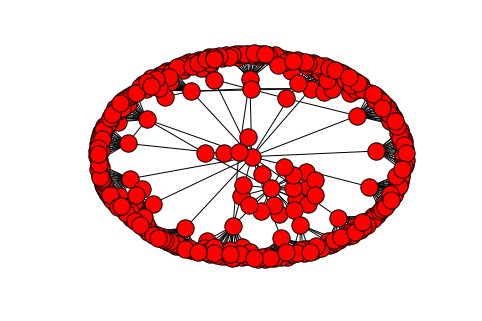

In [53]:
%matplotlib inline
import matplotlib.pyplot as plt
nx.draw(G)
plt.show()